# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 1

**Правила:**

* Выполненную работу нужно отправить телеграм-боту, адрес которого будет указан на странице курса до конца недели. Обращаем ваше внимание, что в боте необходимо заранее зарегистрироваться и дождаться подтверждения.
* Дедлайн **17 февраля в 18:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [3]:
sns.set_palette('kek')

ValueError: kek is not a valid palette name

### Задача 1

Для выполнения задания выберите любой профиль, в течении 1-2 недель его можно поменять. Студенты кафедры инновационная педагогика выполняют задание по профилю педагогика.

**Профиль биология**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

Для исследования рекомендуется выбрать столбцы 'ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N', но можно взять и другие.

**Профиль физика**

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

**Профиль педагогика**

Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [5]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./dielectron.csv")

Посмотрим на первые строки этой таблицы.

In [6]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


Выберите несколько (3-6) столбцов для анализа значений в них.

In [52]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['E2', 'px2', 'eta2', 'phi2']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']
df_chosen_columns

,E2,px2,eta2,phi2
0,11.28360,-1.032340,-2.344030,-2.072810
1,17.14920,-11.713500,0.808077,2.734920
2,15.82030,-1.472800,-2.455080,2.148570
3,25.12730,4.087860,2.330210,0.565865
4,13.88710,-0.277757,-2.423700,-1.684810
...,...,...,...,...
99995,1.80181,0.668609,0.307851,-1.171470
99996,14.69110,-1.418020,-2.383880,-2.126960
99997,72.81740,-11.074900,-2.300410,-2.444050
99998,8.58671,0.378009,1.677170,1.448610


#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


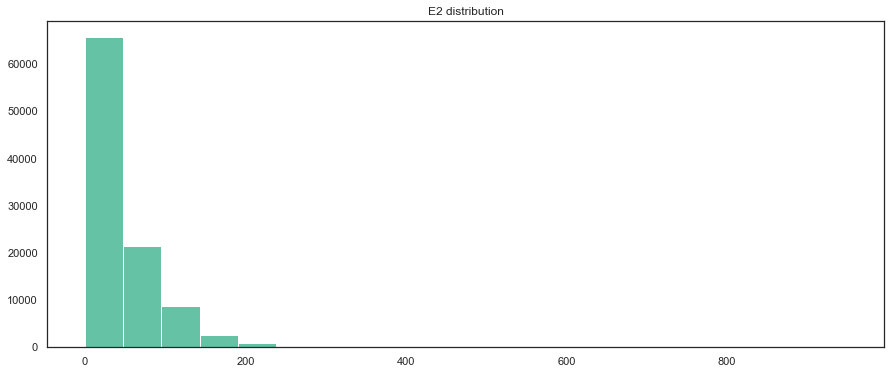

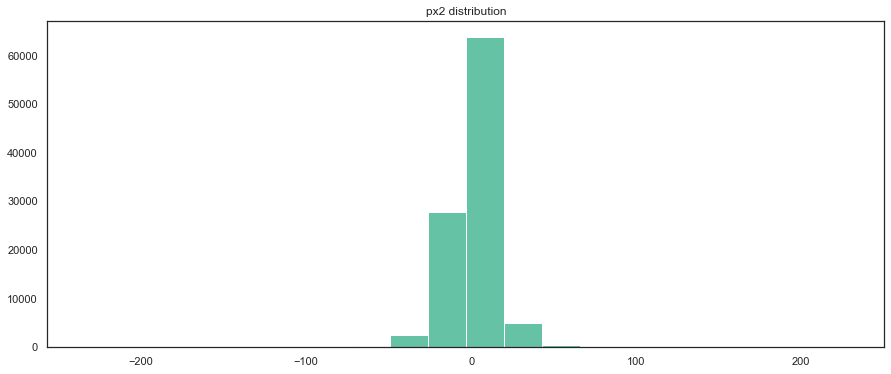

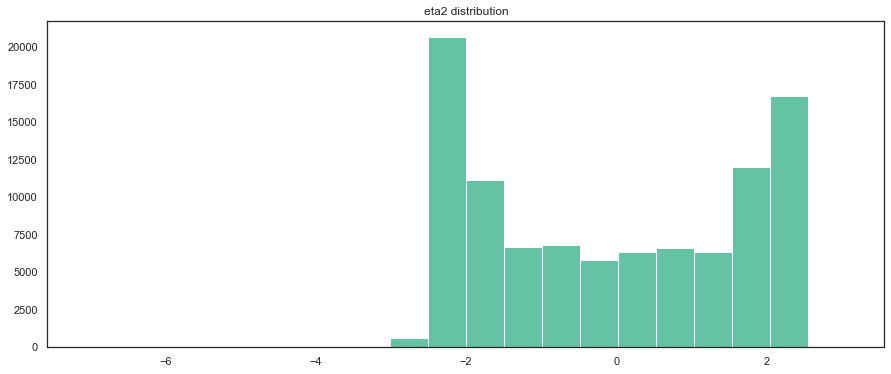

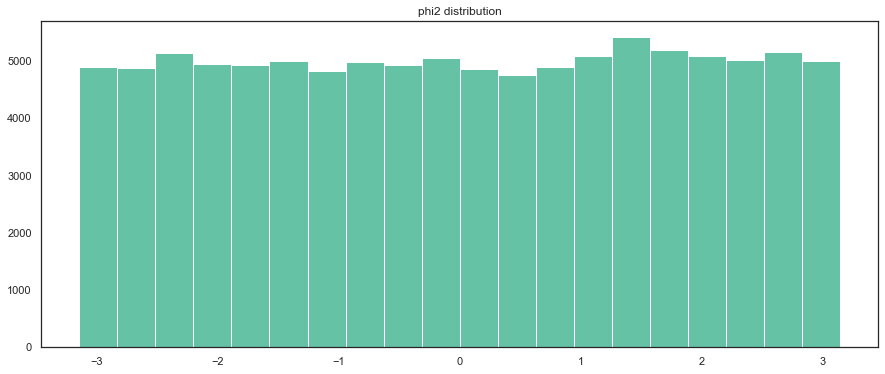

In [53]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df_chosen_columns[column], bins=20)
    plt.title(column + ' distribution');

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ:** Если честно, изначально я подумал, что ни в одной из исследуемых признаков нет явно выраженных выбросов. Но по предложению, что такого не может быть я написал сюда: "E2" и "px2", остальные признаки явно без выбросов, т.к. столбцы расположены очень плотно сюда по графика(также я еще и проверил это с помощью range). Но как оказалось дальше, "E2" не имеет выборосов, просто распеределение очень смахивает на Exp(1), а вот у "px2" дествительно по краям есть значения, из-за которых портится картина распределения и информация которую мы могли бы получить. Об этом см. дальше

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

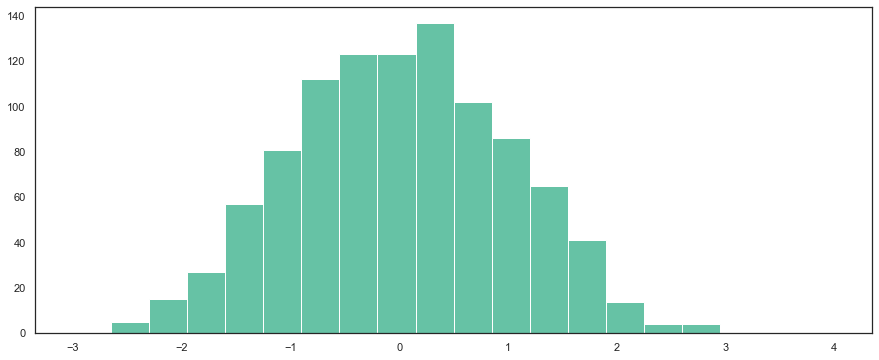

In [19]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

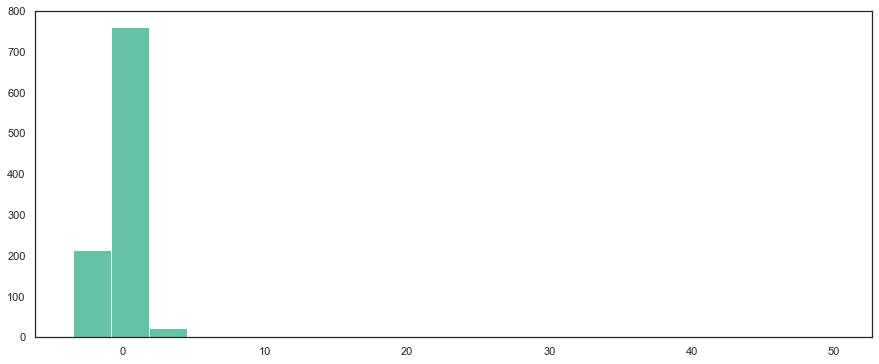

In [20]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

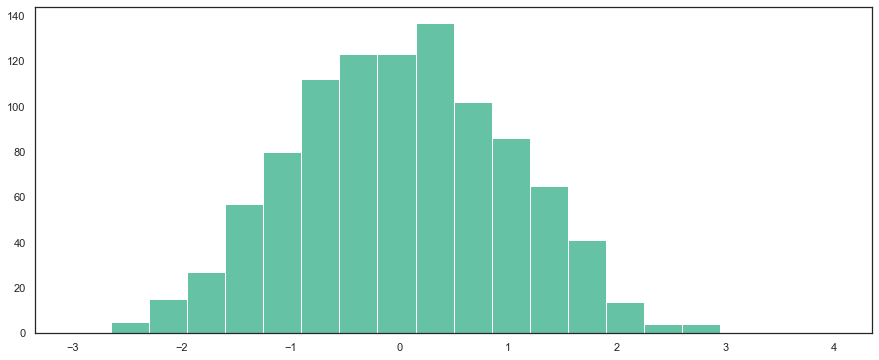

In [21]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

Пример заполнения словаря на ячейке ниже. 

Здесь мы считаем, что для признака `column1` большая часть значений находится в промежутке от -1 до 5, а все значения за пределами этого промежутка — выбросы.
Мы хотим нарисовать информативный график для гистограммы значений признака `column1`, поэтому гистограмму будем строить только на основе значений из промежутка (-1, 5)

Аналогично для признака `column2`

In [65]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

Аналогично определите интервалы для исследуемых признаков

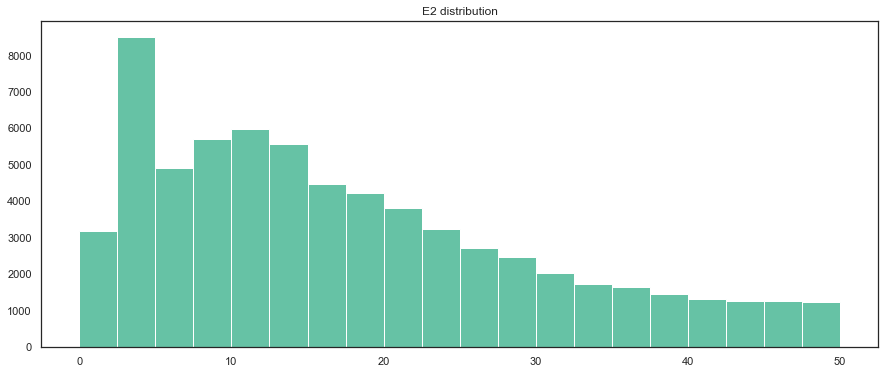

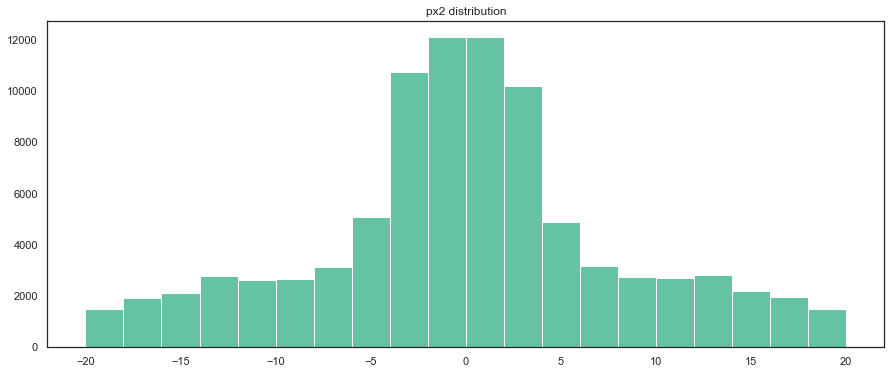

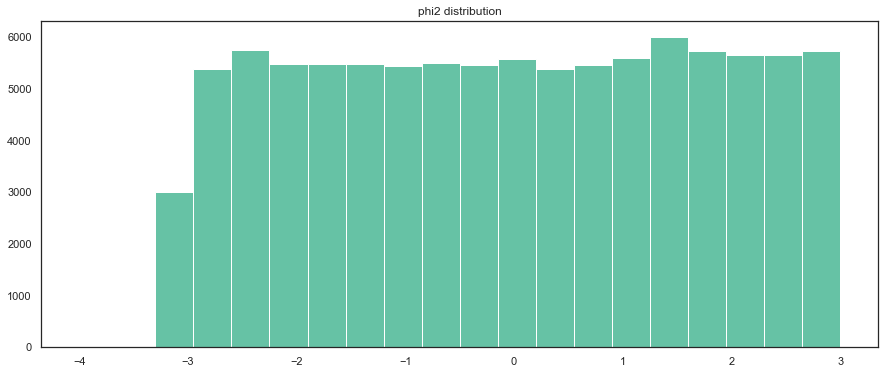

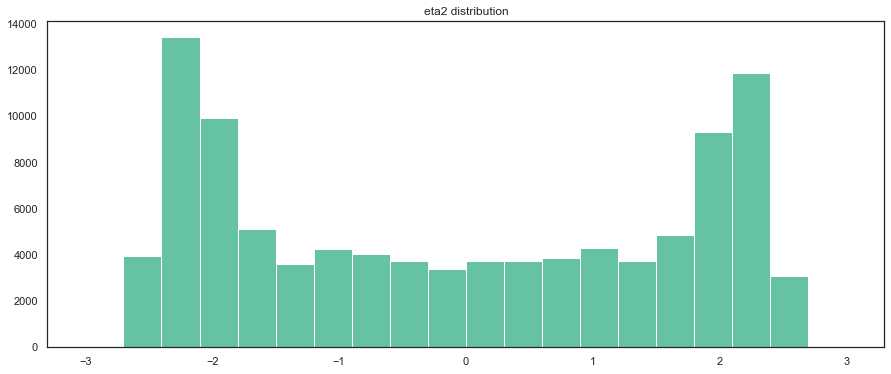

In [66]:
ranges_without_outliers = {
    'E2' : (0, 50),
    "px2" : (-20, 20),
    "phi2" : (-4, 3),
    "eta2" : (-3, 3)
    
}


for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?

**Ответ:** Как было написано выше, только для "px2", видно что до этого из-за информации по краям терялась информация в центре, которая и хранила "гущу" всего.

#### Ядерные оценки плотности

Иногда гистограммы недостаточно, чтобы понять, какое у распределение у элементов выборки. В таких случаях можно использовать ядерные оценки плотности. 

В библиотеке `seaborn` они представлены функциями `distplot` (в версиях до `0.11.1`), `kdeplot` (начиная с версии `0.11.1`)

In [67]:
sns.__version__

'0.10.1'

Пример для нормального распределения с выбросом.

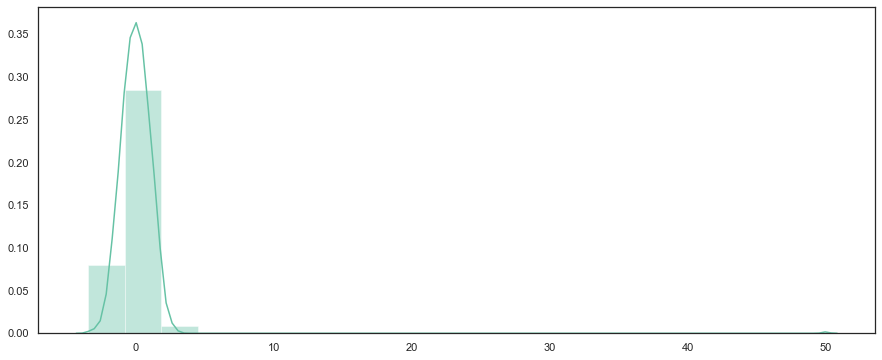

In [68]:
plt.figure(figsize=(15, 6))
sns.distplot(sample, bins=20);

Видно, что, даже несмотря на "хвост", плотность основной части данных довольно похожа на плотность нормального распределения. Теперь нарисуем этот же график для выборки без выброса.

Для наглядности на этом же графике нарисуем плотность стандартного нормального распределения. В библиотеке `scipy` плотность распределения называется `pdf`.

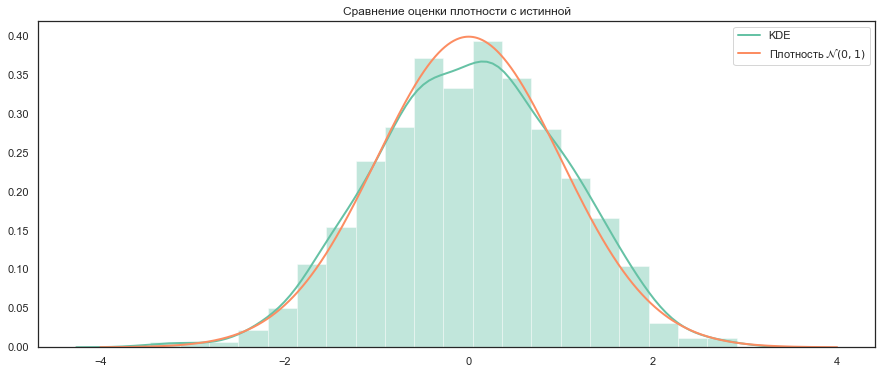

In [69]:
# уберем выброс
sample_wo_ourliers = sample[1:]

# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-4, 4, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.distplot(sample_wo_ourliers, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Однако ядерные оценки плотности тоже не универсальны.
Рассмотрим пример экспоненциального распределения.

Сгенерируйте выборку размера 100 из экспоненциального распределения $\textit{Exp(1)}$. Для этого воспользуйтесь функцией `sps.expon.rvs`.

In [75]:
my_data = sps.expon.rvs(size = 100)
my_data

array([1.40916251, 0.35298125, 0.7648778 , 0.30727023, 0.67154408,
       0.0947233 , 0.84281517, 0.87193124, 0.22024971, 0.04389508,
       1.74521119, 0.78032784, 3.31394037, 1.3086772 , 0.27576869,
       1.2863497 , 0.9659153 , 0.53485549, 0.40370602, 0.49751105,
       0.10878003, 0.22171669, 0.63875479, 0.59353836, 3.19634462,
       0.42093089, 0.88858676, 0.20155347, 0.63968891, 1.24088459,
       3.78779671, 1.31059427, 2.66584508, 0.45549981, 0.20262815,
       0.12402674, 0.3589091 , 0.03235731, 1.6890623 , 0.51104372,
       0.05397959, 1.99569437, 0.5831995 , 0.0473877 , 0.55940911,
       1.03009694, 0.30754543, 0.23043989, 0.39346624, 0.43938556,
       0.65450891, 1.46852497, 0.70669489, 4.32684465, 0.07733079,
       0.23254553, 0.92305703, 0.18481378, 0.91328296, 3.48024609,
       1.21745482, 0.05393328, 0.58937097, 1.03911079, 0.24925362,
       0.31183965, 0.45400147, 0.00731978, 1.3902684 , 0.40394959,
       3.87111871, 0.06809305, 0.00961099, 0.82984155, 1.86785

Посчитайте значения плотности этого распределения на промежутке от 0 до 6.

In [78]:
grid_1 = np.linspace(0, 6, 1000)
exp_pdf_values = sps.expon.pdf(grid_1)


Нарисуйте гистограмму и ядерную оценку плотности для выборки из сгененированного экспоненциального распределения.

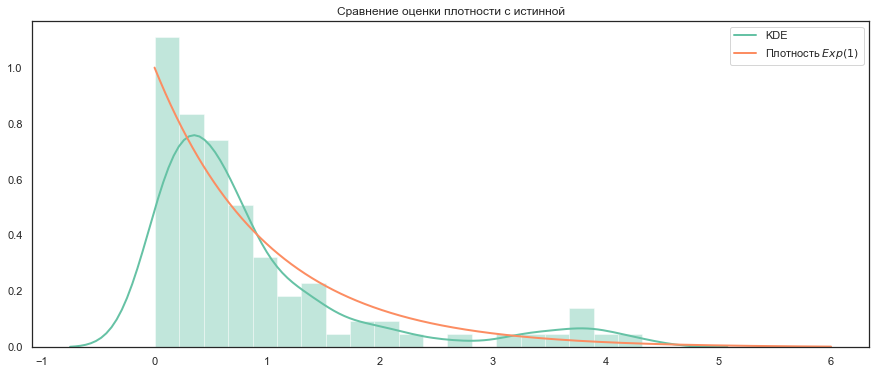

In [85]:
plt.figure(figsize=(15, 6))
sns.distplot(my_data, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid_1, exp_pdf_values, label='Плотность $Exp(1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Как вы думаете, почему ядерная оценка плотности так плохо приближает реальную плотность распределения?

**Ответ:** У меня есть пару предположений:

1) Конечно же от того как работает ядерное сглаживание. То есть идея: каждый элемент выборки будет цетром блока и по ним мы и сглаживаем. Проблема в том, что мы выбираем элементы выборки, хоть и из распределения, но случайно(по крайней мере так предполагается), а значит может выпасть так, что элементы с меньшей выпало "больше", чем стоило. И по ним и настроится ядерное сглаживание. 

2) Не совсем понятно, какой тип ядра берется то ли гауссово, то ли экспоненциальное, то ли еще какое-то. Возможно, я криворукий и этот параметр нужно это настраивать, и понятно, что некоторый тип ядер более препочтительней других, а `sns.distplot` берет какое-то не предпочтительное. Но к сожалению я зашел в доки по этой функции, и ничего не нашел(признаться честно, я очень мало искал, просто прочитал описание и быстро пролистал страницу. Мб это можно настроить).

Нарисуйте гистограммы и ядерные оценки плотности для исследуемых признаков

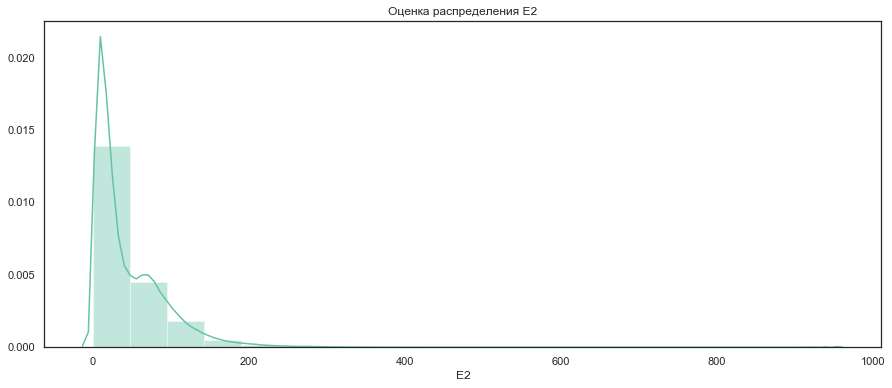

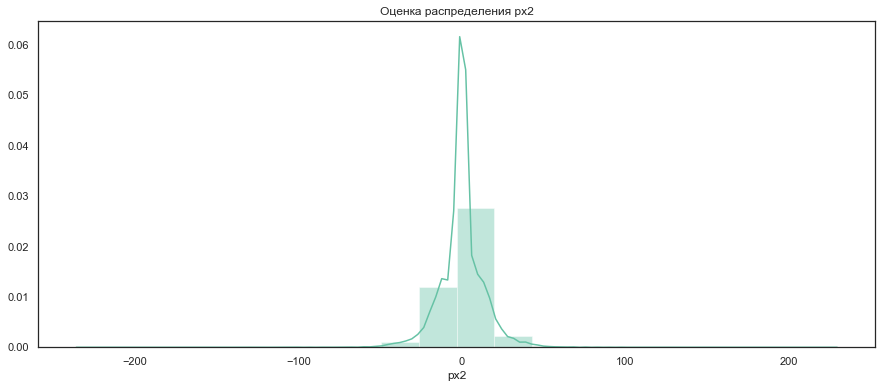

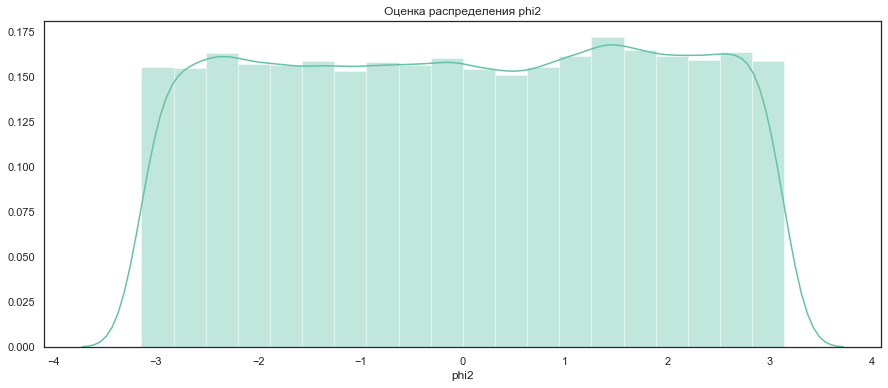

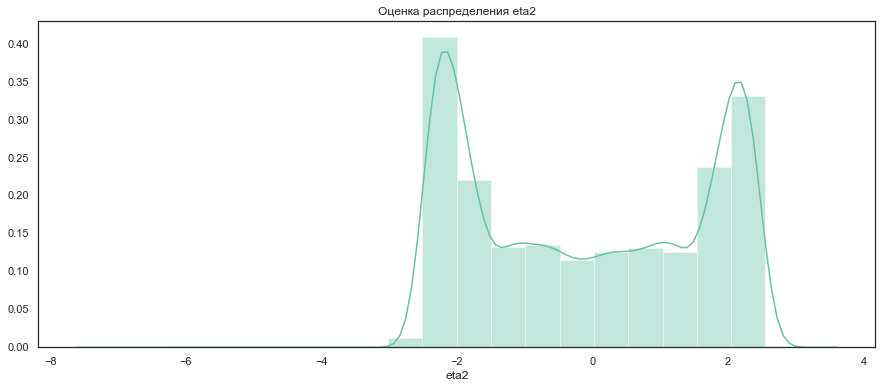

In [90]:
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    
    # для каждого признака оставьте значения внутри ранее заданного промежутка column_range
    
    sns.distplot(df_chosen_columns[column], bins=20);
    plt.title('Оценка распределения ' + column)

**Сделайте выводы.** Какой из двух видов графиков более нагляден для данных выборки? Какими свойствами должно обладать распределение признака, чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность? 

**Вывод:**

Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бОльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда.
Прежде, чем удалять выбросы из выборки, хорошо бы понимать:
1. **Какая цель исследования**. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
2. **Почему** отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.



**Приведите примеры исследований**, в которых нужно/не нужно удалять выбросы в данных:

*Нужно:*

Пример из лекции: измеряем росты котиков, если котик встал на две лапки --- выброс. Его лучше убрать

*Не нужно:*

Задача: предсказать поломку в самолете. В данном случае мы принципиально ищем аномалии, чтобы предотвратить крушение.

**Сделайте выводы по всей задаче:**

В зависимости от цели задачи нам стоит предобрабатывать данные. Смотреть их гистограммы и распределения и искать выбросы. Также неплохо в поиске истинного вида распределения помогает ядерное сглаживание, но всегда работает хорошо.

### Задача 2

В этой задаче нужно визуализировать *центральную предельную теорему*.



*a).* Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. 

In [308]:
size = 300  # размер выборки
samples_count = 500 # количество выборок
sample = sps.expon.rvs(size=(samples_count, size))
sample.shape

(500, 300)

По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. 

In [309]:
X_in = np.cumsum(sample, axis=1)
X_in.shape

(500, 300)

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [310]:
math_expectation = np.arange(1, size+1) # E = n/1

#Отнимаю матож
X_in -= math_expectation
#Делю на дисперсию
X_in /= np.sqrt(math_expectation)
X_in.shape

(500, 300)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

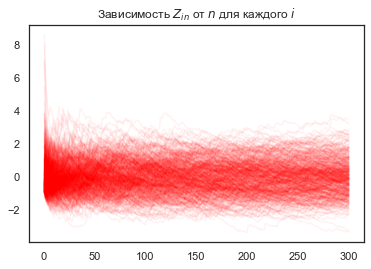

In [311]:
n = np.arange(1, size+1)
for i in range(samples_count):
    plt.plot(n, X_in[i], alpha=0.05, color = 'red')
    plt.title("Зависимость $Z_{in}$ от $n$ для каждого $i$")

*Нет, не сходятся. Видно по графику.*


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

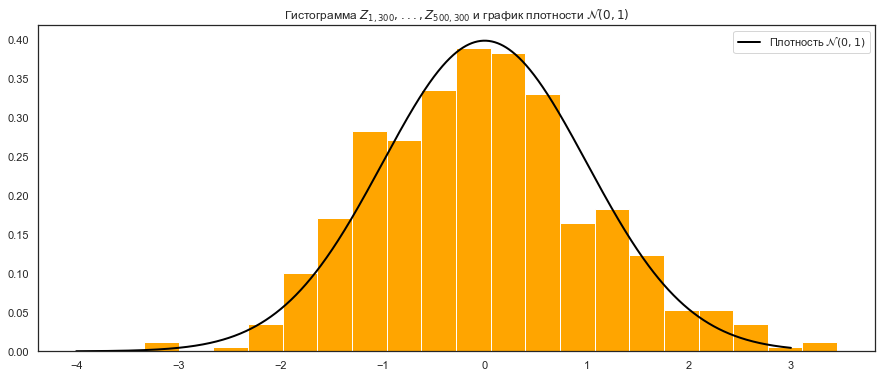

In [312]:
temp = np.linspace(-4, 3, 1000)
norm_values = sps.norm.pdf(temp)

plt.figure(figsize=(15, 6))
plt.hist(X_in[:, 299], bins=20, color = "orange", density=True)
plt.plot(temp, norm_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2, color = "black")
plt.title('Гистограмма $Z_{1,300},..., Z_{500,300}$ и график плотности $\mathcal{N}(0, 1)$')
plt.legend();






*b).* Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

In [313]:
sample_pois = sps.poisson.rvs(mu = 1, size=(samples_count, size))
sample_pois = sample_pois.astype(float)
sample_pois.shape

(500, 300)

In [314]:
Pois_in = np.cumsum(sample_pois, axis = 1)
Pois_in.shape

(500, 300)

In [315]:
math_expec_poiss = np.arange(1, size + 1)

#отнимаю матож
Pois_in -= math_expec_poiss

#делю на дисперсию
Pois_in /= np.sqrt(math_expec_poiss)

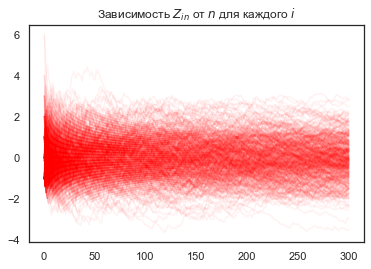

In [316]:
n_poiss = np.arange(1, size + 1)

for i in range(samples_count):
    plt.plot(n_poiss, Pois_in[i], alpha=0.05, color = 'red')
    plt.title("Зависимость $Z_{in}$ от $n$ для каждого $i$")

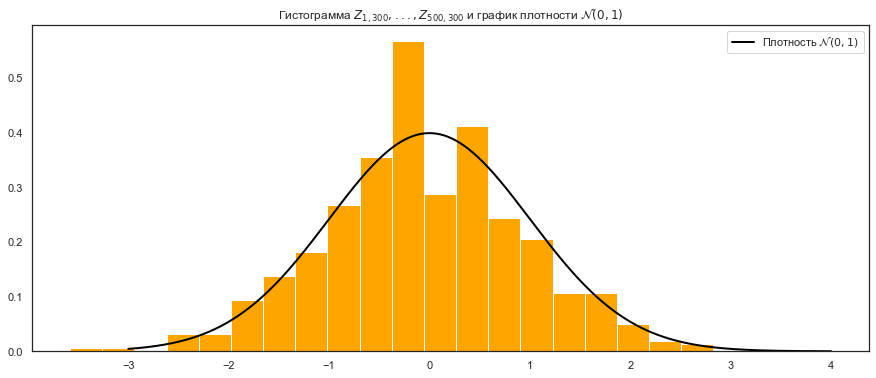

In [317]:
temp_pois = np.linspace(-3, 4, 1000)
norm_values_pois = sps.norm.pdf(temp_pois)

plt.figure(figsize=(15, 6))
plt.hist(Pois_in[:, 299], bins=20, color = "orange", density=True)
plt.plot(temp_pois, norm_values_pois, label='Плотность $\\mathcal{N}(0,1)$', lw=2, color = "black")
plt.title('Гистограмма $Z_{1,300},..., Z_{500,300}$ и график плотности $\mathcal{N}(0, 1)$')
plt.legend();

Даже не знаю, что написать, кроме как: да, видно, что *ЦПТ* работает, и это круто!